In [1]:
#======================================================================
#
#     This routine solves an infinite horizon growth model 
#     with dynamic programming and sparse grids
#
#     The model is described in Scheidegger & Bilionis (2017)
#     https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2927400
#
#     external libraries needed:
#     - IPOPT (https://projects.coin-or.org/Ipopt)
#     - PYIPOPT (https://github.com/xuy/pyipopt)
#     - TASMANIAN (http://tasmanian.ornl.gov/)
#
#     Simon Scheidegger, 11/16 ; 07/17
#======================================================================
import pdb
import nonlinear_solver_initial as solver     #solves opt. problems for terminal VF
import nonlinear_solver_iterate as solviter   #solves opt. problems during VFI
from parameters import *                      #parameters of model
import interpolation as interpol              #interface to sparse grid library/terminal VF
import interpolation_iter as interpol_iter    #interface to sparse grid library/iteration
import postprocessing as post                 #computes the L2 and Linfinity error of the model

import TasmanianSG                            #sparse grid library
import numpy as np
from matplotlib import pyplot as plt

#======================================================================
# Start with Value Function Iteration

# terminal value function
valnew=TasmanianSG.TasmanianSparseGrid()
if (numstart==0):
    valnew, initval, initgridpts=interpol.sparse_grid(n_agents, iDepth)
    valnew.write("valnew_1." + str(numstart) + ".txt") #write file to disk for restart

# value function during iteration
else:
    valnew.read("valnew_1." + str(numstart) + ".txt")  #write file to disk for restart
    
valold=TasmanianSG.TasmanianSparseGrid()
valold=valnew
#for i in range(numstart, numits):
for i in range(numstart, numits):
    print(i)
    valnew=TasmanianSG.TasmanianSparseGrid()
    valnew, values, gridpts=interpol_iter.sparse_grid_iter(n_agents, iDepth, valold)
    valold=TasmanianSG.TasmanianSparseGrid()
    valold=valnew
    valnew.write("valnew_1." + str(i+1) + ".txt")
    
#======================================================================
print( "===============================================================")
print( " " )
print( " Computation of a growth model of dimension ", n_agents ," finished after ", numits, " steps")
print( " " )
print( "===============================================================")
#======================================================================

# compute errors   
avg_err=post.ls_error(n_agents, numstart, numits, No_samples)

#======================================================================
print( "===============================================================")
print( " ")
print( " Errors are computed -- see errors.txt")
print( " ")
print( "===============================================================")
#======================================================================


0
1
2
3
4
5
6
7
8
9
 
(' Computation of a growth model of dimension ', 1, ' finished after ', 10, ' steps')
 
 
 Errors are computed -- see errors.txt
 


In [2]:
print(values.shape)
print(gridpts.shape)
print(values)

(9, 5)
(9, 1)
[[-305.42893457 -305.42893457 -305.42893457 -305.42893456 -305.42893456]
 [-305.83252258 -305.83252258 -305.83252258 -305.83252258 -305.83252255]
 [-305.32957346 -305.32957346 -305.32957346 -305.32957346 -305.32957346]
 [-305.53330826 -305.53330826 -305.53330826 -305.53330826 -305.53330826]
 [-305.36945989 -305.36945989 -305.36945989 -305.36945989 -305.36945989]
 [-305.62783652 -305.62783652 -305.62783652 -305.62783652 -305.62783651]
 [-305.47245014 -305.47245014 -305.47245013 -305.47245014 -305.47245014]
 [-305.3958078  -305.3958078  -305.3958078  -305.3958078  -305.3958078 ]
 [-305.34781062 -305.34781062 -305.34781062 -305.34781062 -305.34781062]]


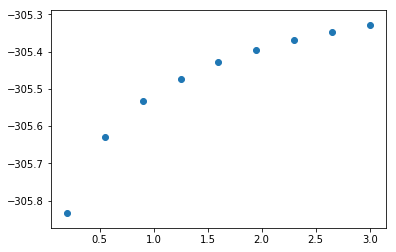

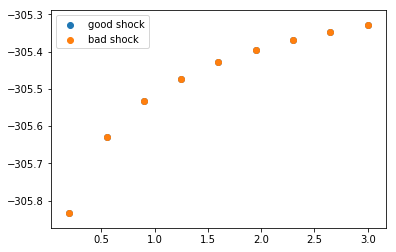

In [4]:
plt.figure()
plt.scatter(gridpts[:,0],values[:,4], label="good shock")
plt.scatter(gridpts[:,0],values[:,1], label="bad shock")
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.scatter(initgridpts,initval)
plt.show()
print(initval)
print(initgridpts)